In [1]:
pwd

'/mnt/USB_HDD_1TB/GitHub/keyhandshapediscovery/ipynb'

In [2]:
cd ..

/mnt/USB_HDD_1TB/GitHub/keyhandshapediscovery


In [3]:
import scriptFile as sf
import importlib as impL
import helperFuncs as funcH
import projRelatedHelperFuncs as prHF
import os
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

Using TensorFlow backend.


'/mnt/USB_HDD_1TB/GitHub/keyhandshapediscovery'

In [4]:
import torch
import os
import helperFuncs as funcH
from pandas import DataFrame as pd_df
from sklearn.metrics import confusion_matrix
impL.reload(prHF)

figsize=(8,3) 
dpi=360

cf_int = 532
impL.reload(funcH)
experiments_folder = funcH.directory_find('cf{:d}'.format(cf_int), root=funcH.getVariableByComputerName('data_dir'))
print(experiments_folder)

# update_centroid_df
# analyze_correspondance_results
# map_predictions
# _cumsum_preds - prHF.cumsum_preds
# calc_tup_sc - prHF.calc_tup_sc

search went up by 0</media/doga/SSD258/DataPath>
/media/doga/SSD258/DataPath/vaesae_experiments_cor/exp_conv_ae_simple_is28_cf532


39
dict_keys(['epoch0009', 'epoch0014', 'epoch0019', 'epoch0024', 'epoch0029', 'epoch0034', 'epoch0039', 'epoch0044', 'epoch0049', 'epoch0054', 'epoch0059', 'epoch0064', 'epoch0069', 'epoch0074', 'epoch0079', 'epoch0084', 'epoch0089', 'epoch0094', 'epoch0099', 'epoch0104', 'epoch0109', 'epoch0114', 'epoch0119', 'epoch0124', 'epoch0129', 'epoch0134', 'epoch0139', 'epoch0144', 'epoch0149', 'epoch0154', 'epoch0159', 'epoch0164', 'epoch0169', 'epoch0174', 'epoch0179', 'epoch0184', 'epoch0189', 'epoch0194', 'epoch0199'])
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
general_acc_for(sil_sort): 0.8445666666666667
max_run_acc(1.0000), at 0(%0.00)
[0.1 0.1 0.1 ... 1.  1.  1. ]
general_acc_for(rec_sort): 0.8445666666666667
max_run_acc(1.0000), at 0(%0.00)
[0.1 0.1 0.1 ... 1.  1.  1. ]
general_acc_for(sr_sort): 0.8445666666666667
max_run_acc(1.0000), at 0(%0.00)
[0.1 0.1 0.1

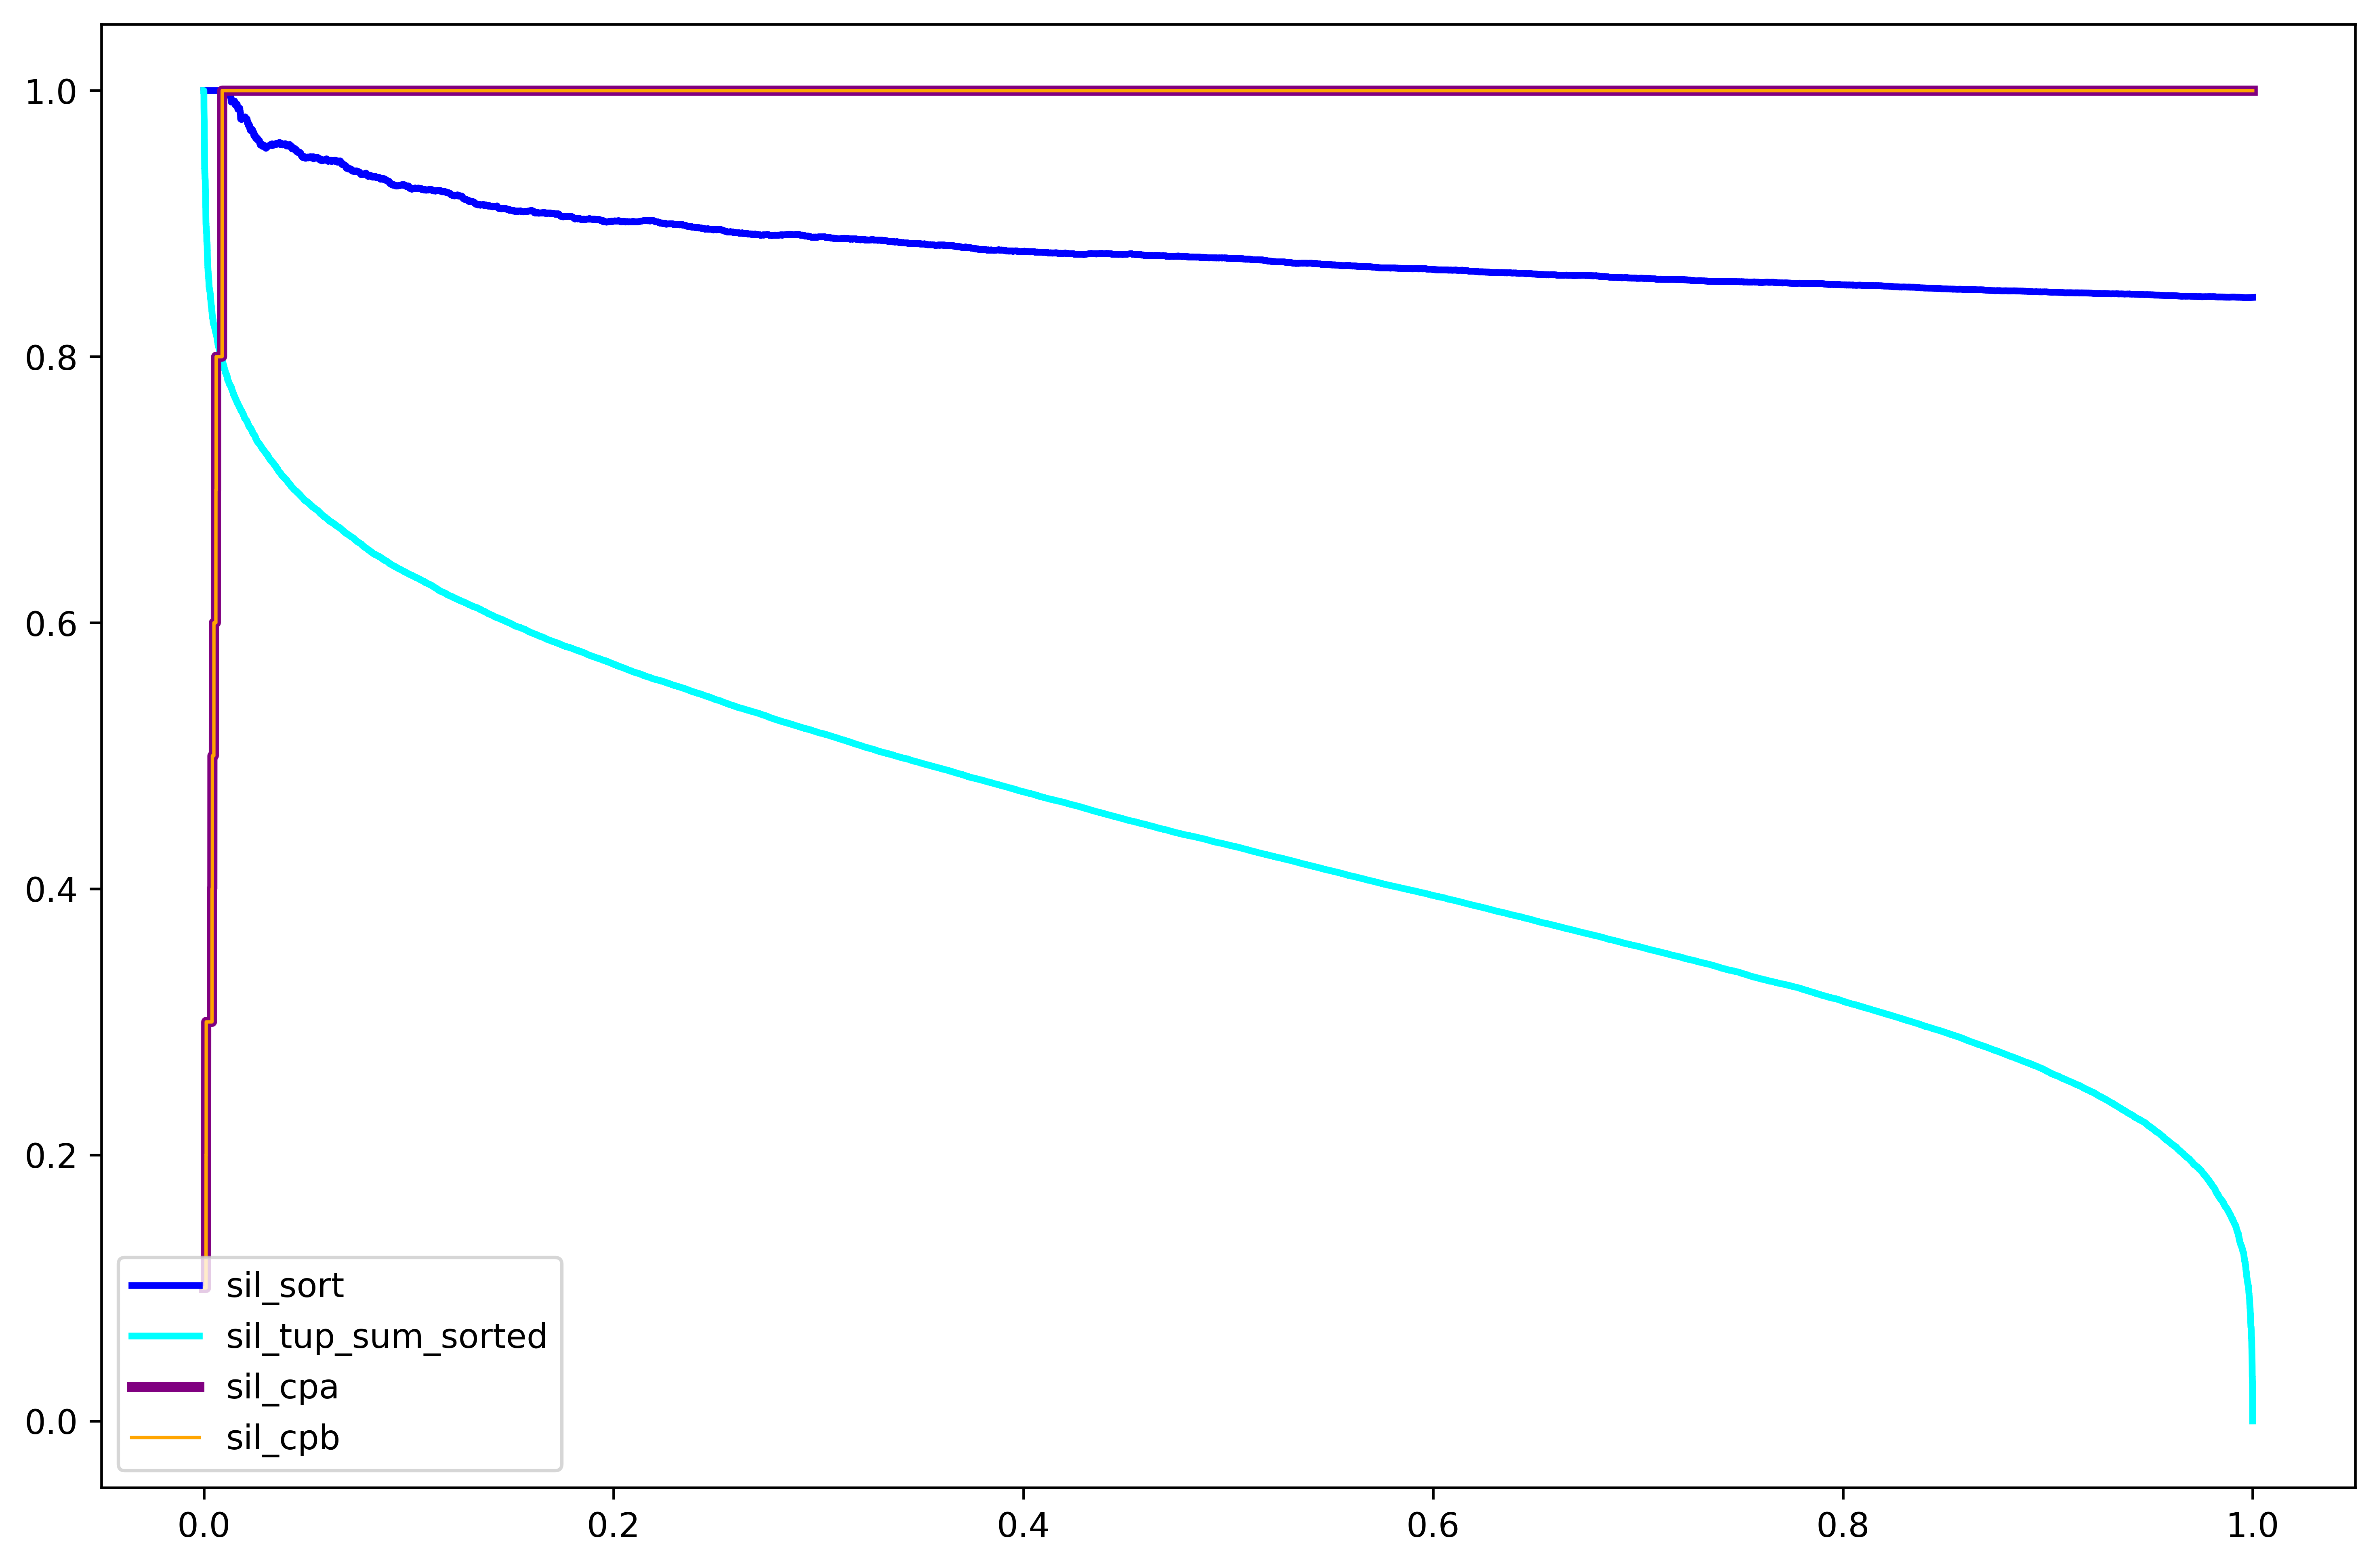

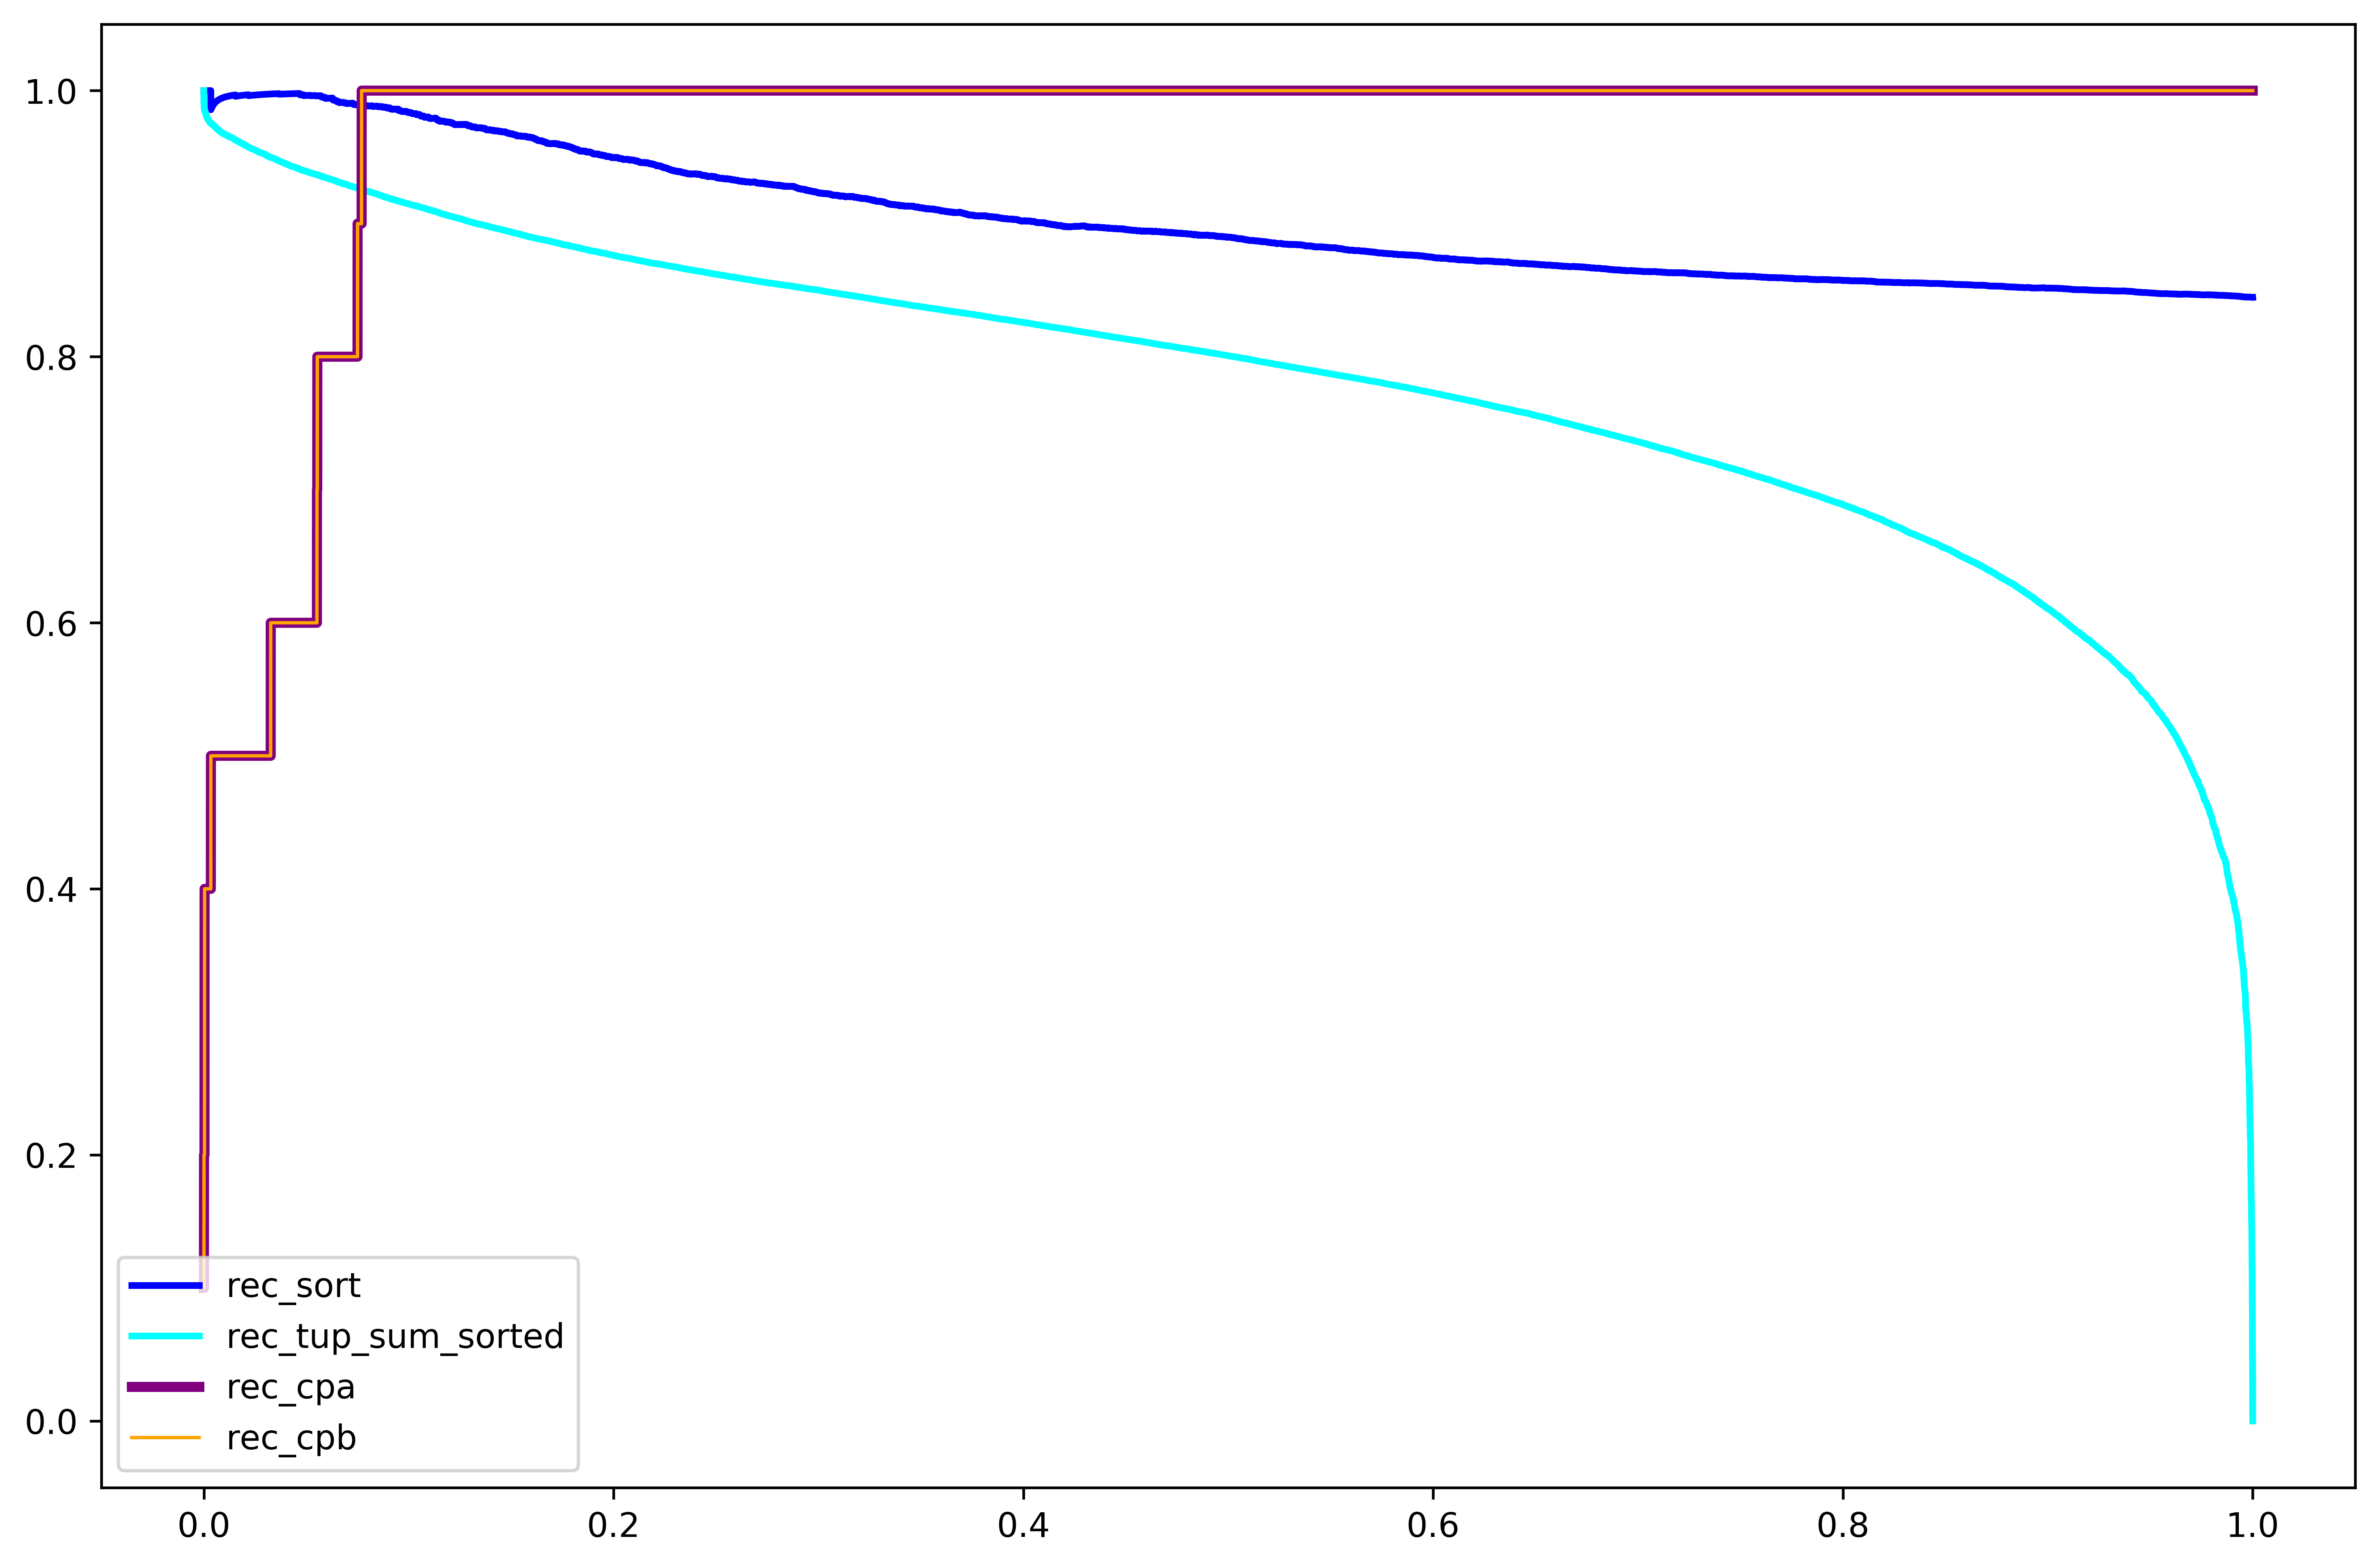

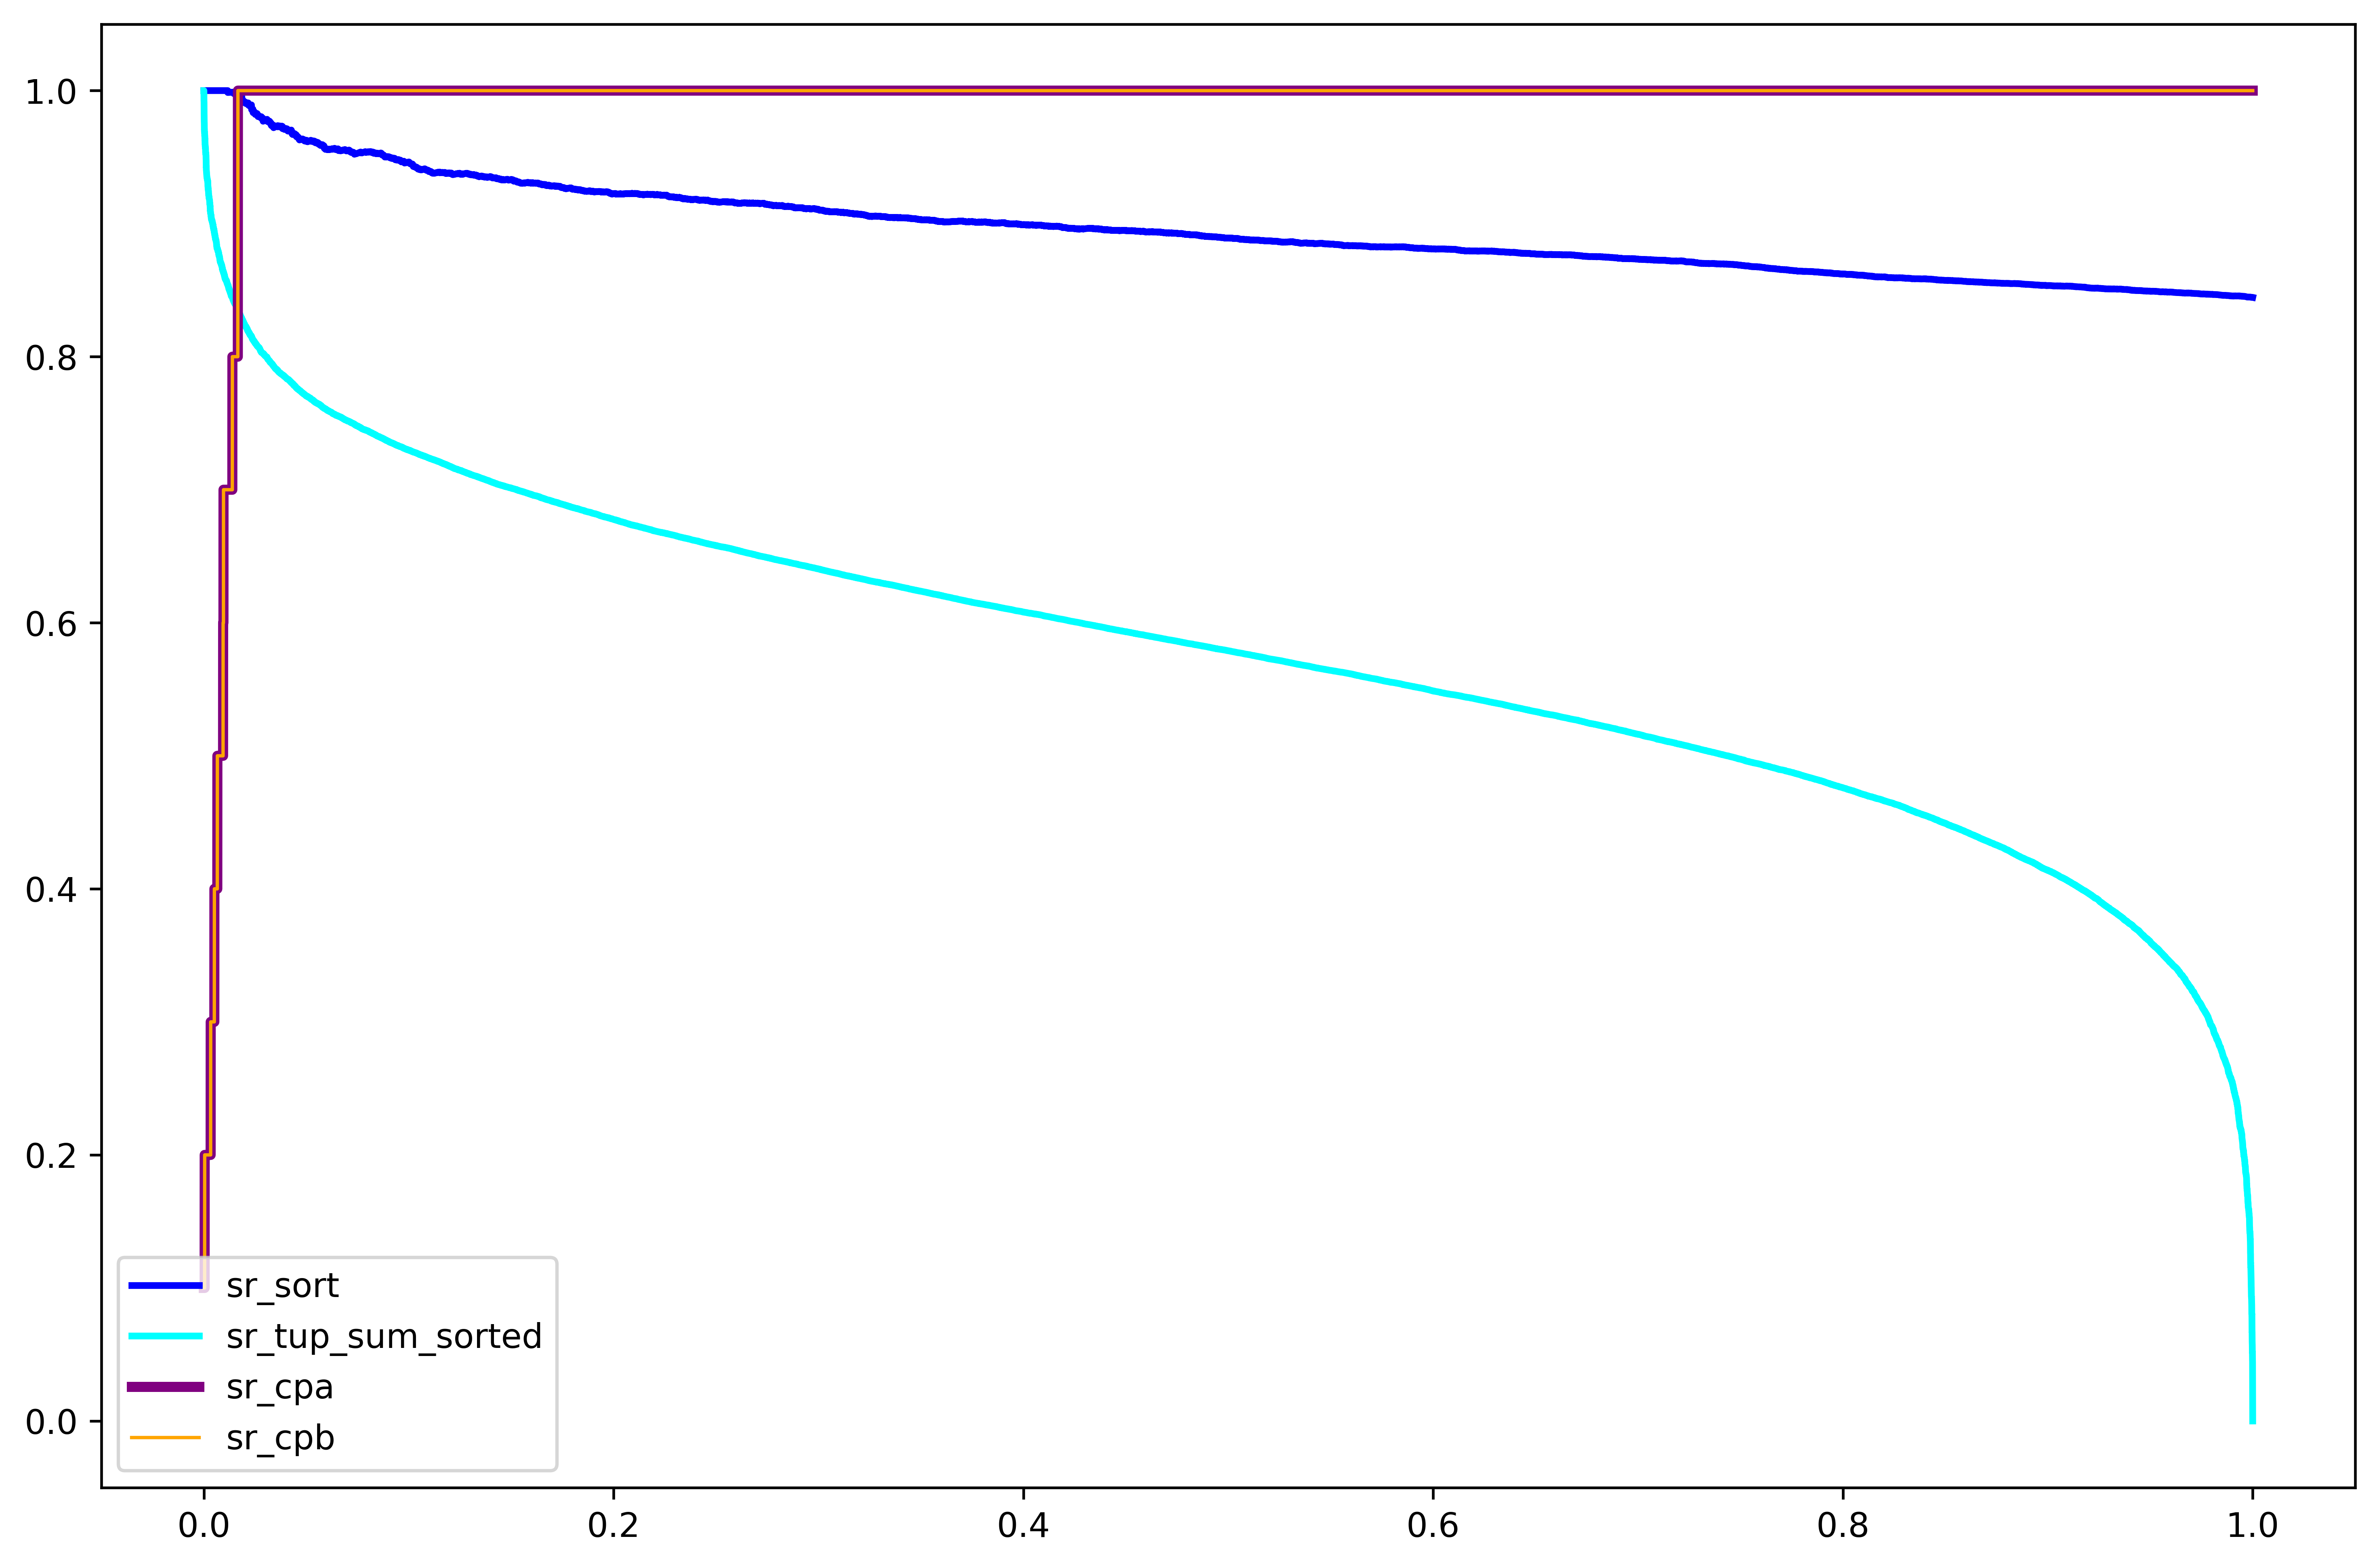

*-*-*Saving(/media/doga/SSD258/DataPath/vaesae_experiments_cor/exp_conv_ae_simple_is28_cf532/plots/compare009_0.8446.jpeg)


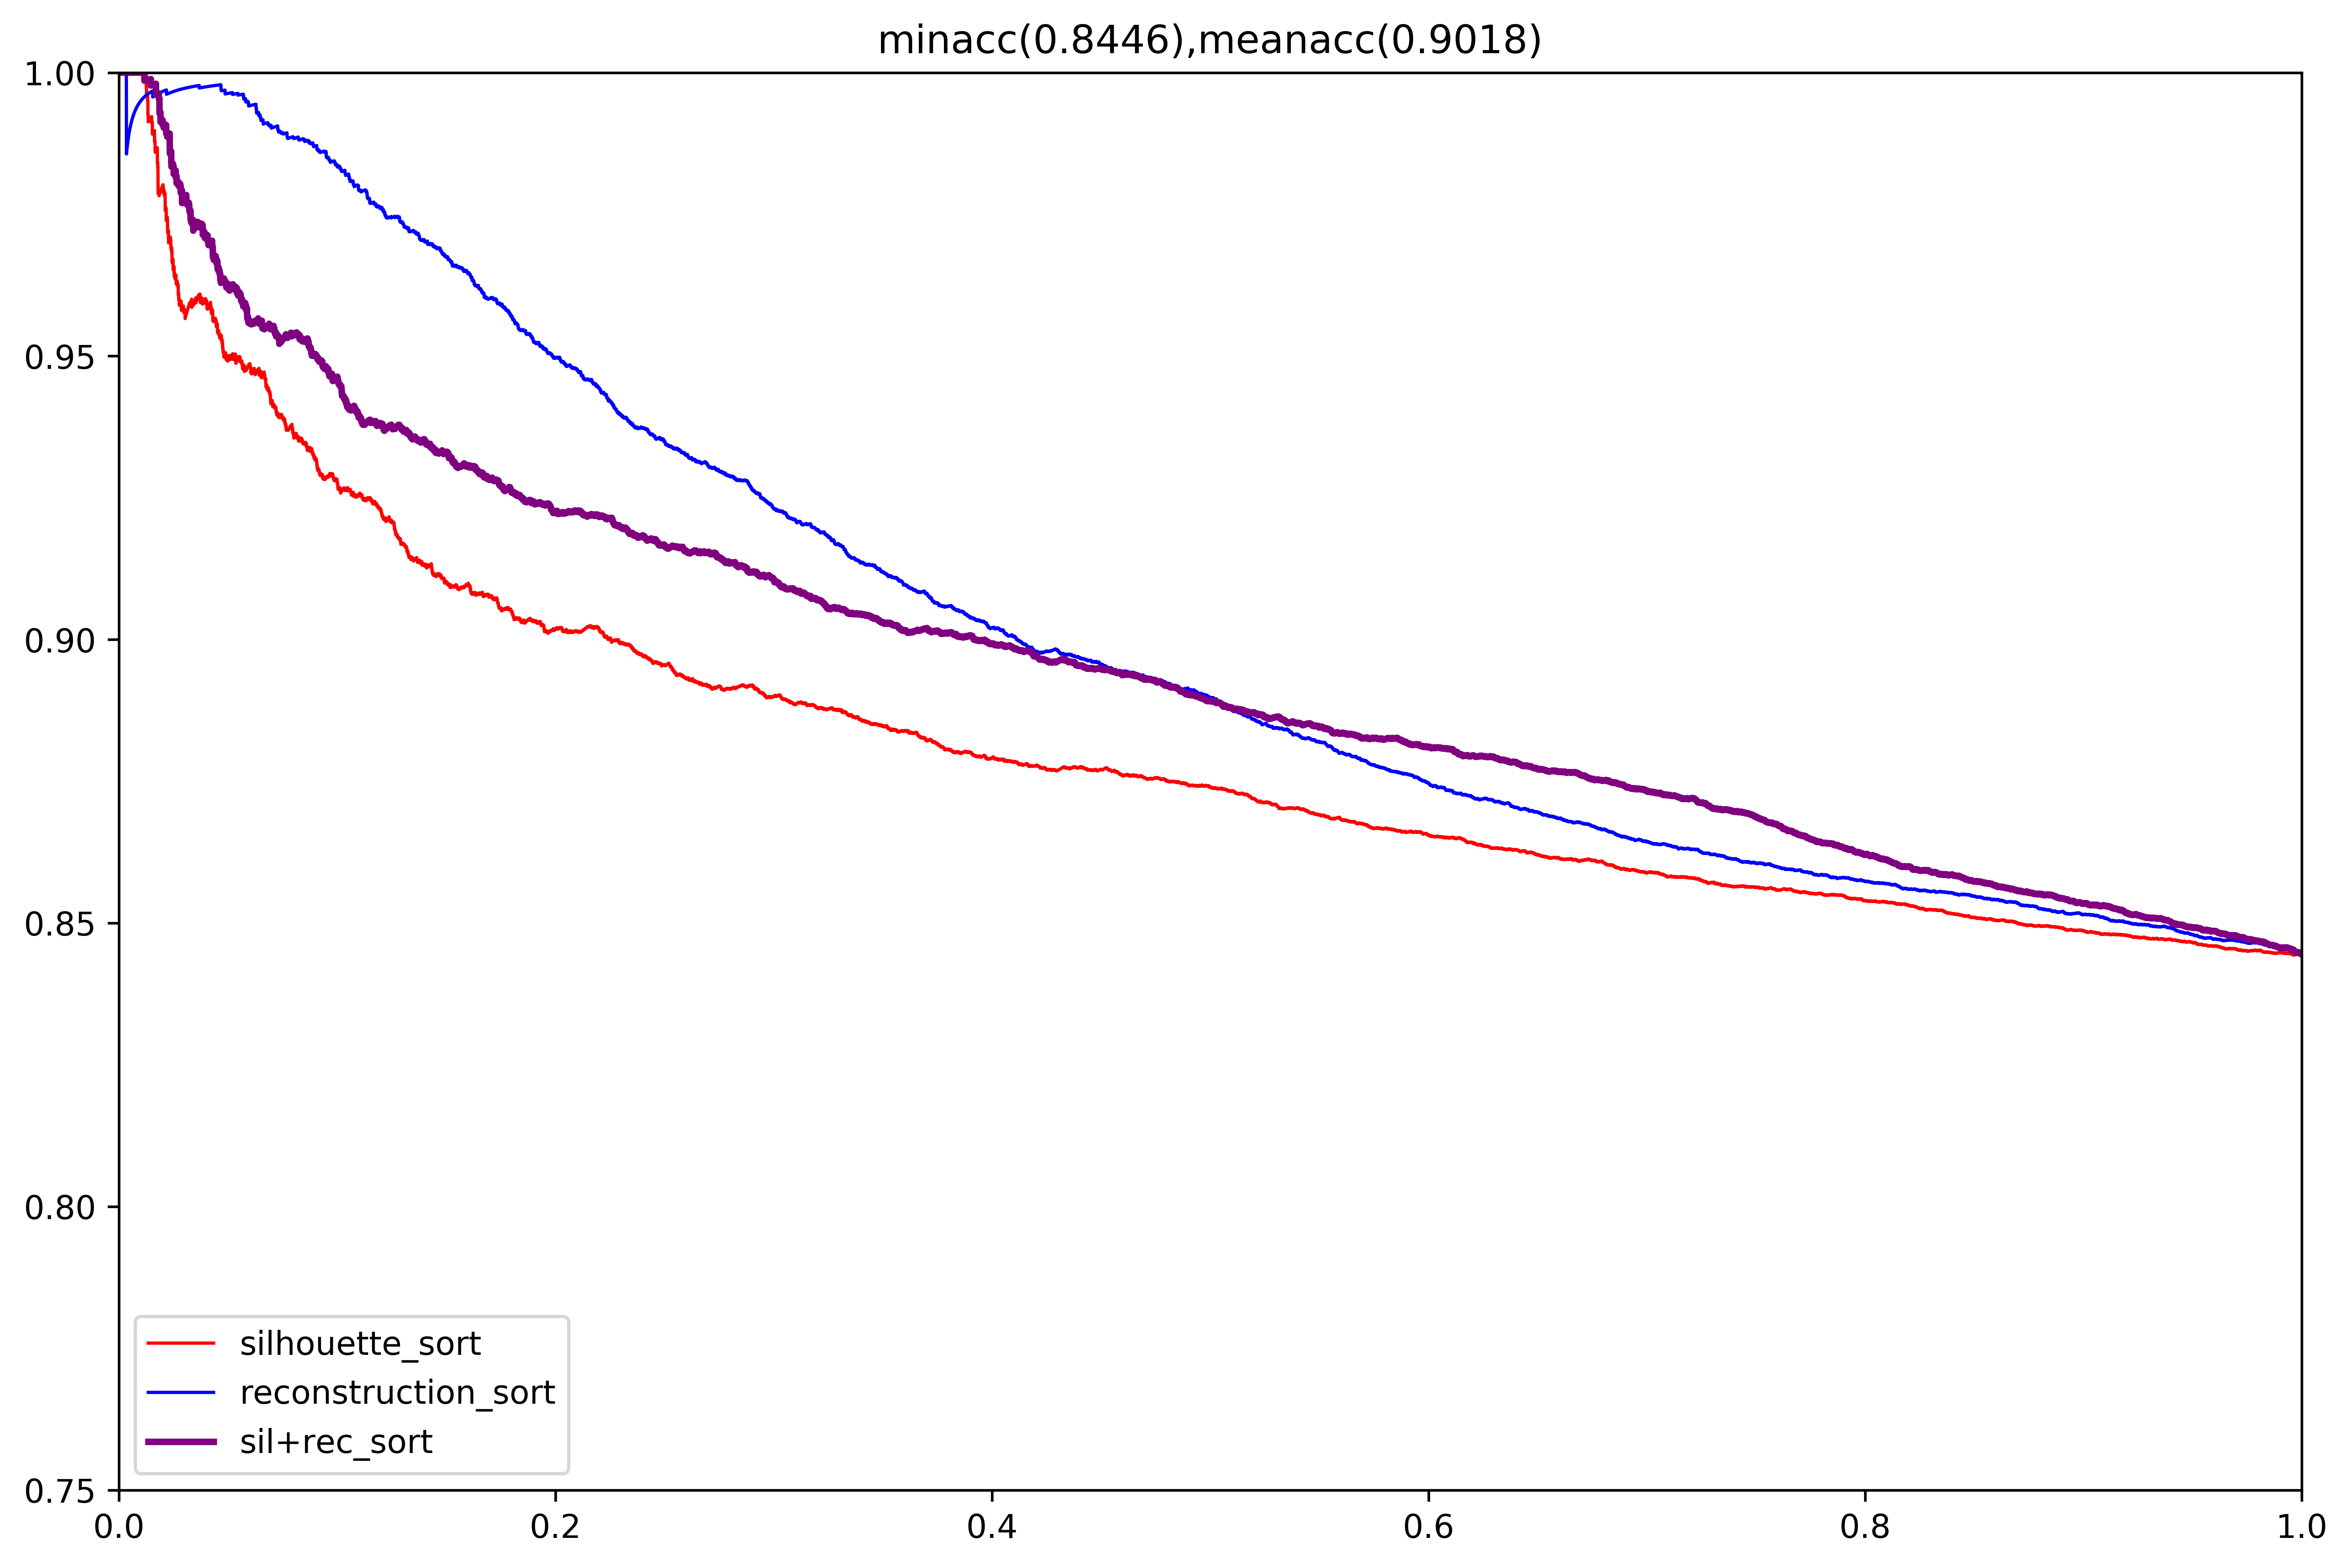

In [5]:
impL.reload(prHF)
def get_epoch(ep_str):
    print(sil_var[ep_str].keys())
    silhouette_values = sil_var[ep_str]["silhouette_values"]
    silhouette_avg = sil_var[ep_str]["silhouette_avg"]
    reconstruction_loss = sil_var[ep_str]["reconstruction_loss"]
    correspondance_weights = sil_var[ep_str]["correspondance_weights"]
    sil_var[ep_str]["predictions"] = np.asarray(sil_var[ep_str]["predictions"],dtype=int)
    labels = sil_var[ep_str]["labels"]
    correspondance_tuple = sil_var[ep_str]["correspondance_tuple"]
    kluster_centroids = sil_var[ep_str]["kluster_centroids"]
    return sil_var[ep_str]

exp_fold = experiments_folder
silhouette_reconstruction_sort_file = os.path.join(exp_fold, "silhouette_reconstruction.torch")
sil_var = torch.load(silhouette_reconstruction_sort_file, map_location=torch.device('cpu'))
print(len(sil_var))
print(sil_var.keys())
if False:
    for ep_str in sil_var.keys():
        _evs = get_epoch(ep_str=ep_str)
        epoch_id = int(ep_str.replace("epoch", ""))
        prHF.calc_tup_sc(_evs["silhouette_values"], _evs["reconstruction_loss"], 
                         _evs["correspondance_tuple"], _evs["labels"], 
                         ep_id=epoch_id, experiments_folder=exp_fold)
else:
    _evs = get_epoch(ep_str='epoch0009')
    epoch_id = 9
    prHF.calc_tup_sc(_evs["silhouette_values"], _evs["reconstruction_loss"], 
                     _evs["correspondance_tuple"], _evs["labels"], 
                     ep_id=epoch_id, experiments_folder=exp_fold)

In [6]:
kluster_centroids = prHF.update_centroid_df(_evs["kluster_centroids"], _evs["predictions"])
prHF.analyze_correspondance_results(_evs["correspondance_tuple"], _evs["kluster_centroids"], _evs["predictions"], _evs["labels"])

correspondance results:
        labels  sampleCounts
labels                      
0            0          6835
1            9          5469
2           10          7115
3           15          4093
4           20          6446
5           40          4758
6           30          6271
7           49          6159
8           56          5789
9           72          7065
_confMat_corr_preds - acc(100.0000)
confMat - acc(84.5967), correspondance match:
       0      1     2      3     4      5     6      7      8      9
0  9544     44   192    401    56      7  1760      0     71      2
1    44  11614    24    174    20      0    45      0      8      0
2   192     24  8796    122  1494      2  1272      0     48      2
3   401    174   122  10256   528      0   318      0     58      2
4    56     20  1494    528  8998      0  1076      0     41      0
5     7      0     2      0     0  10918     2    423     49    288
6  1760     45  1272    318  1076      2  7418      0    109      0
7

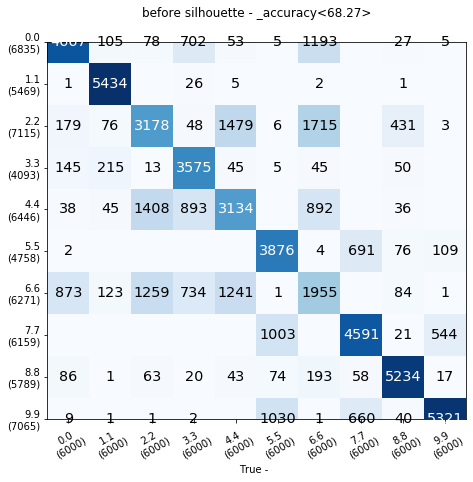

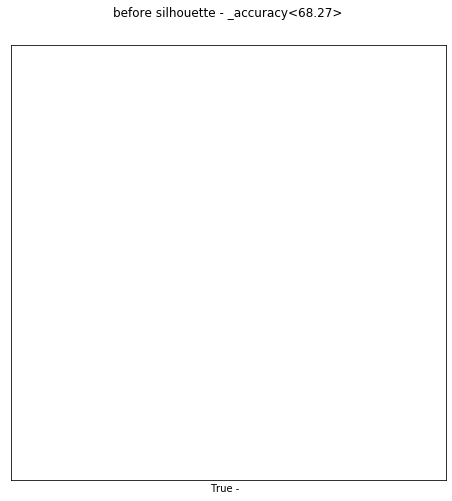

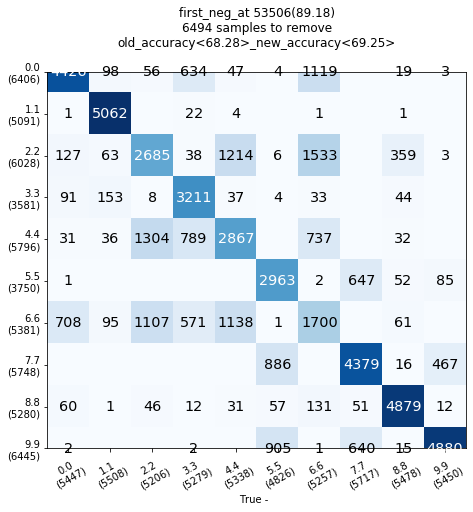

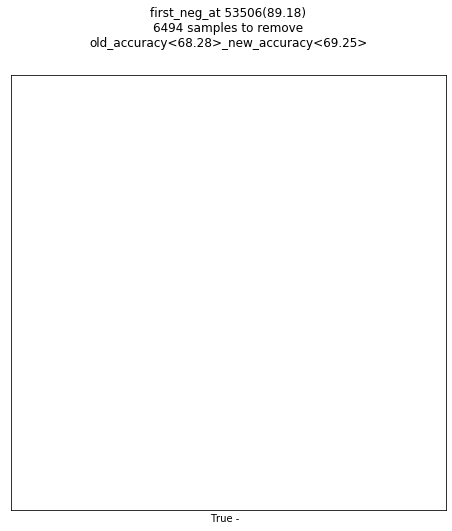

*-*-*
*-*-*
-195.0148 -7.8568144


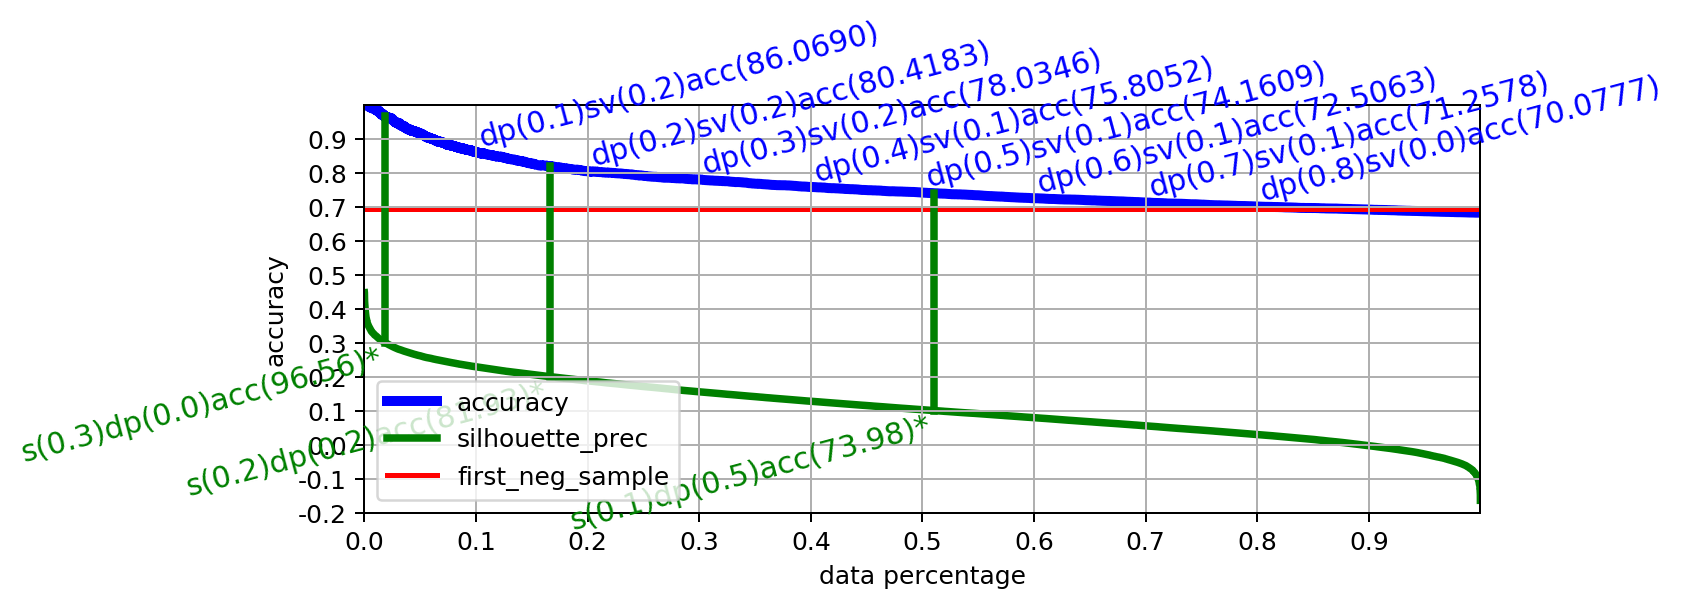

In [11]:
result_dict = prHF.analyze_silhouette_values(_evs["silhouette_values"], _evs["predictions"], _evs["labels"],
                                    centroid_info_pdf=_evs["kluster_centroids"],
                                    label_names=None, conf_plot_save_to='',
                                    figsize=figsize, lw=[4, 3, 2], show_title=False, str_deg=15, str_size=12)
sil_val_sorted, sil_idx = funcH.sortVec(_evs["silhouette_values"])
rec_los_sorted, rec_idx = funcH.sortVec(-_evs["reconstruction_loss"])
rec_los_sorted_0_1 = funcH.map_0_1(-rec_los_sorted)
predictions_mapped = funcH.map_predictions(_evs["labels"], _evs["predictions"], centroid_info_pdf=_evs["kluster_centroids"])
print(np.min(rec_los_sorted), np.max(rec_los_sorted))

0.1765532

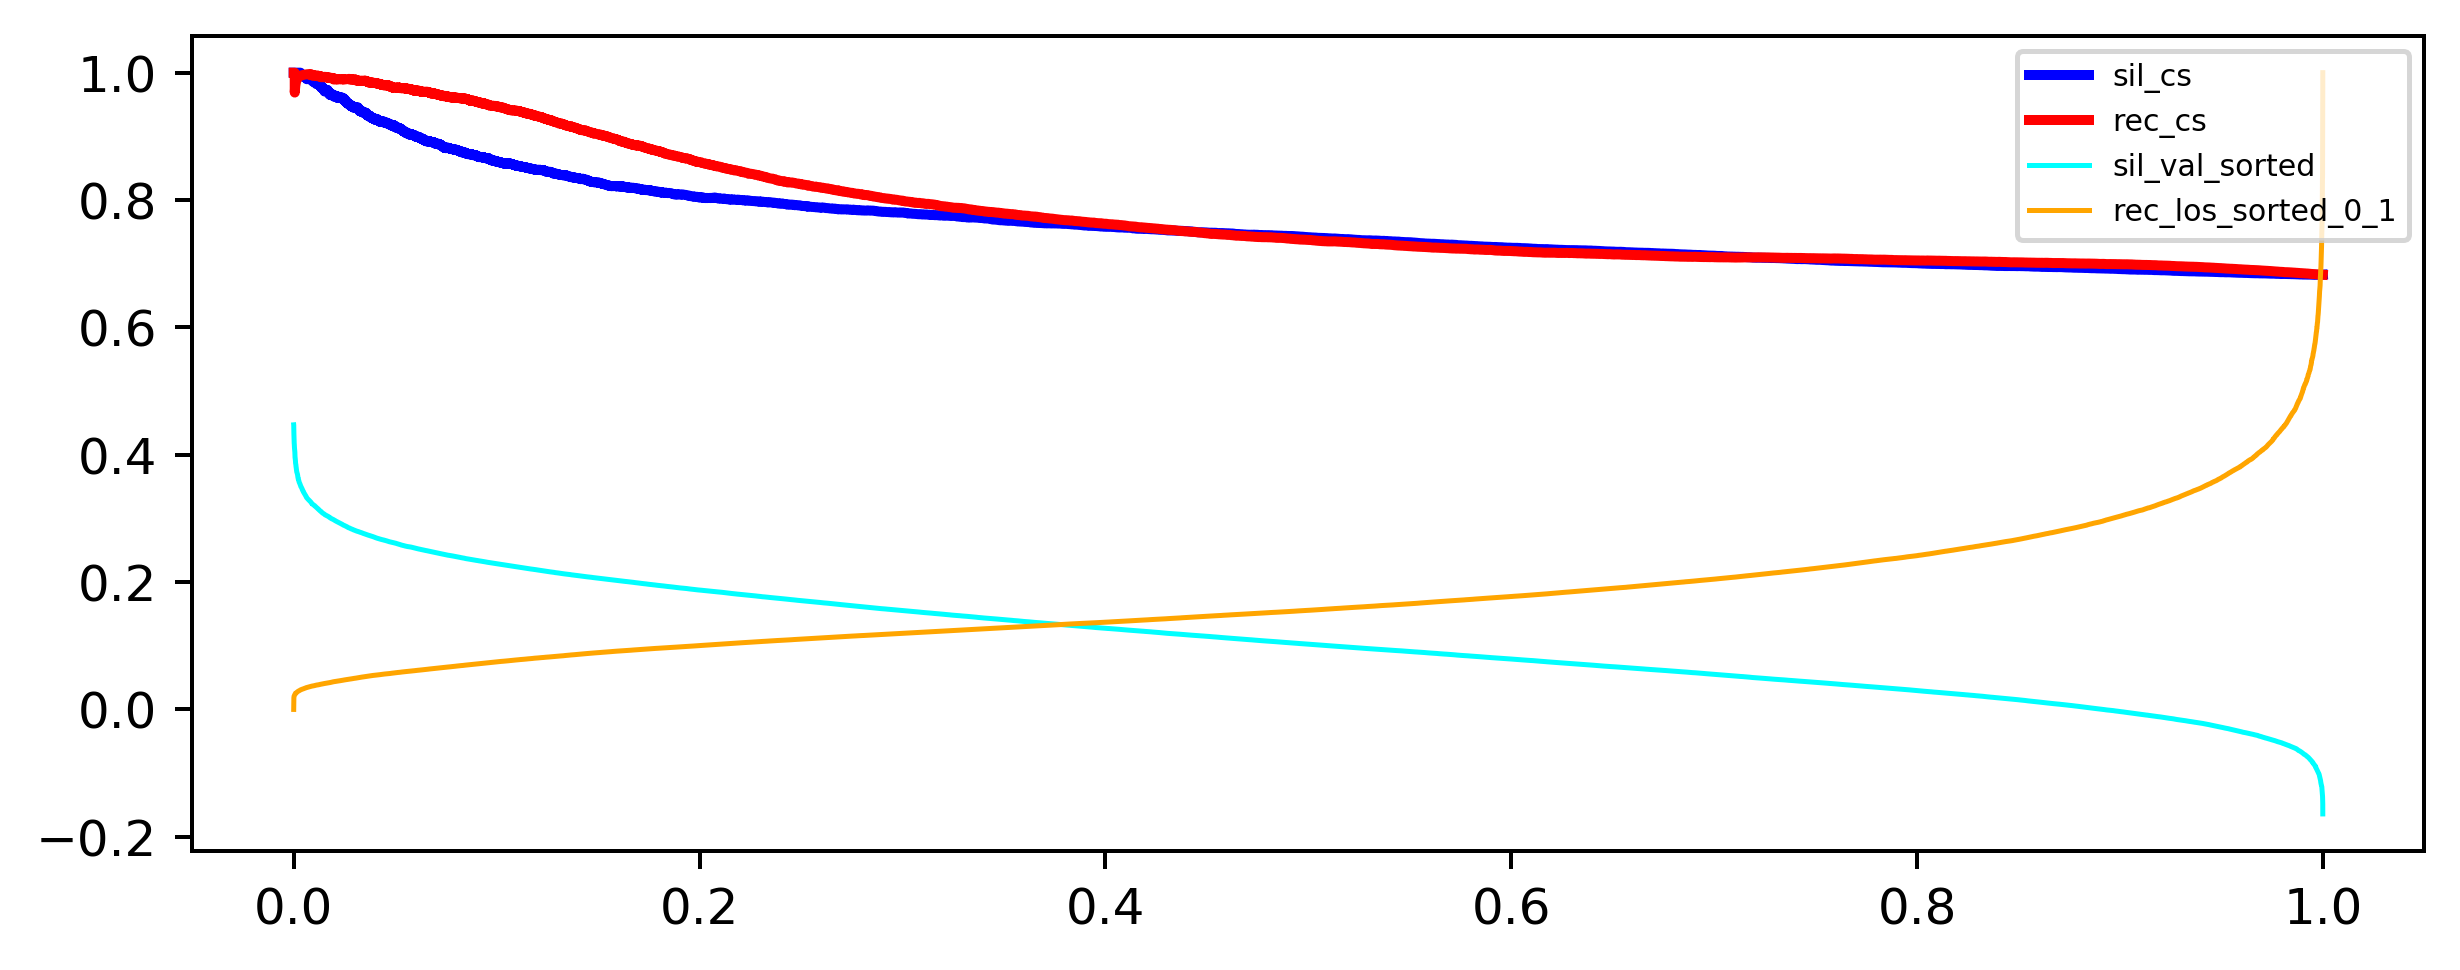

In [12]:
labels = _evs["labels"]
cumsum_preds_sil = funcH.cumsum_preds(labels, predictions_mapped, sil_idx)
cumsum_preds_rec = funcH.cumsum_preds(labels, predictions_mapped, rec_idx)
data_perc_vec = np.arange(0, len(cumsum_preds_rec)) / len(cumsum_preds_rec)

plt.close('all')
fig, ax = plt.subplots(1, figsize=figsize, dpi=dpi)
ax.plot(data_perc_vec, cumsum_preds_sil, lw=2, label='sil_cs', color='blue', ls='-', zorder=0)
ax.plot(data_perc_vec, cumsum_preds_rec, lw=2, label='rec_cs', color='red', ls='-', zorder=0)
ax.plot(data_perc_vec, sil_val_sorted, lw=1, label='sil_val_sorted', color='cyan', ls='-', zorder=0)
ax.plot(data_perc_vec, rec_los_sorted_0_1, lw=1, label='rec_los_sorted_0_1', color='orange', ls='-', zorder=0)
plt.legend(loc='upper right', prop={'size': 6})
np.mean(rec_los_sorted_0_1)

dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
/media/doga/SSD258/DataPath/vaesae_experiments_cor/exp_conv_ae_simple_is28_cf532 14
*-*-*
rec_v(0.1),at(14682),acc(84.25)
rec_v(0.2),at(43541),acc(70.53)
rec_v(0.3),at(54732),acc(69.11)
rec_v(0.4),at(58400),acc(68.70)
rec_v(0.5),at(59529),acc(68.52)
*-*-*
data_perc(0.1),at(6000),acc(96.3506)
data_perc(0.2),at(12000),acc(87.3927)
data_perc(0.3),at(18000),acc(81.0177)
data_perc(0.4),at(24000),acc(76.9343)
data_perc(0.5),at(30000),acc(74.1242)
data_perc(0.6),at(36000),acc(72.0258)
data_perc(0.7),at(42000),acc(70.7697)
data_perc(0.8),at(48000),acc(69.8923)


{'preds_sorted': array([1.        , 1.        , 1.        , ..., 0.68385613, 0.6838614 ,
        0.68386667]),
 'data_perc_vec': array([0.00000000e+00, 1.66666667e-05, 3.33333333e-05, ...,
        9.99950000e-01, 9.99966667e-01, 9.99983333e-01])}

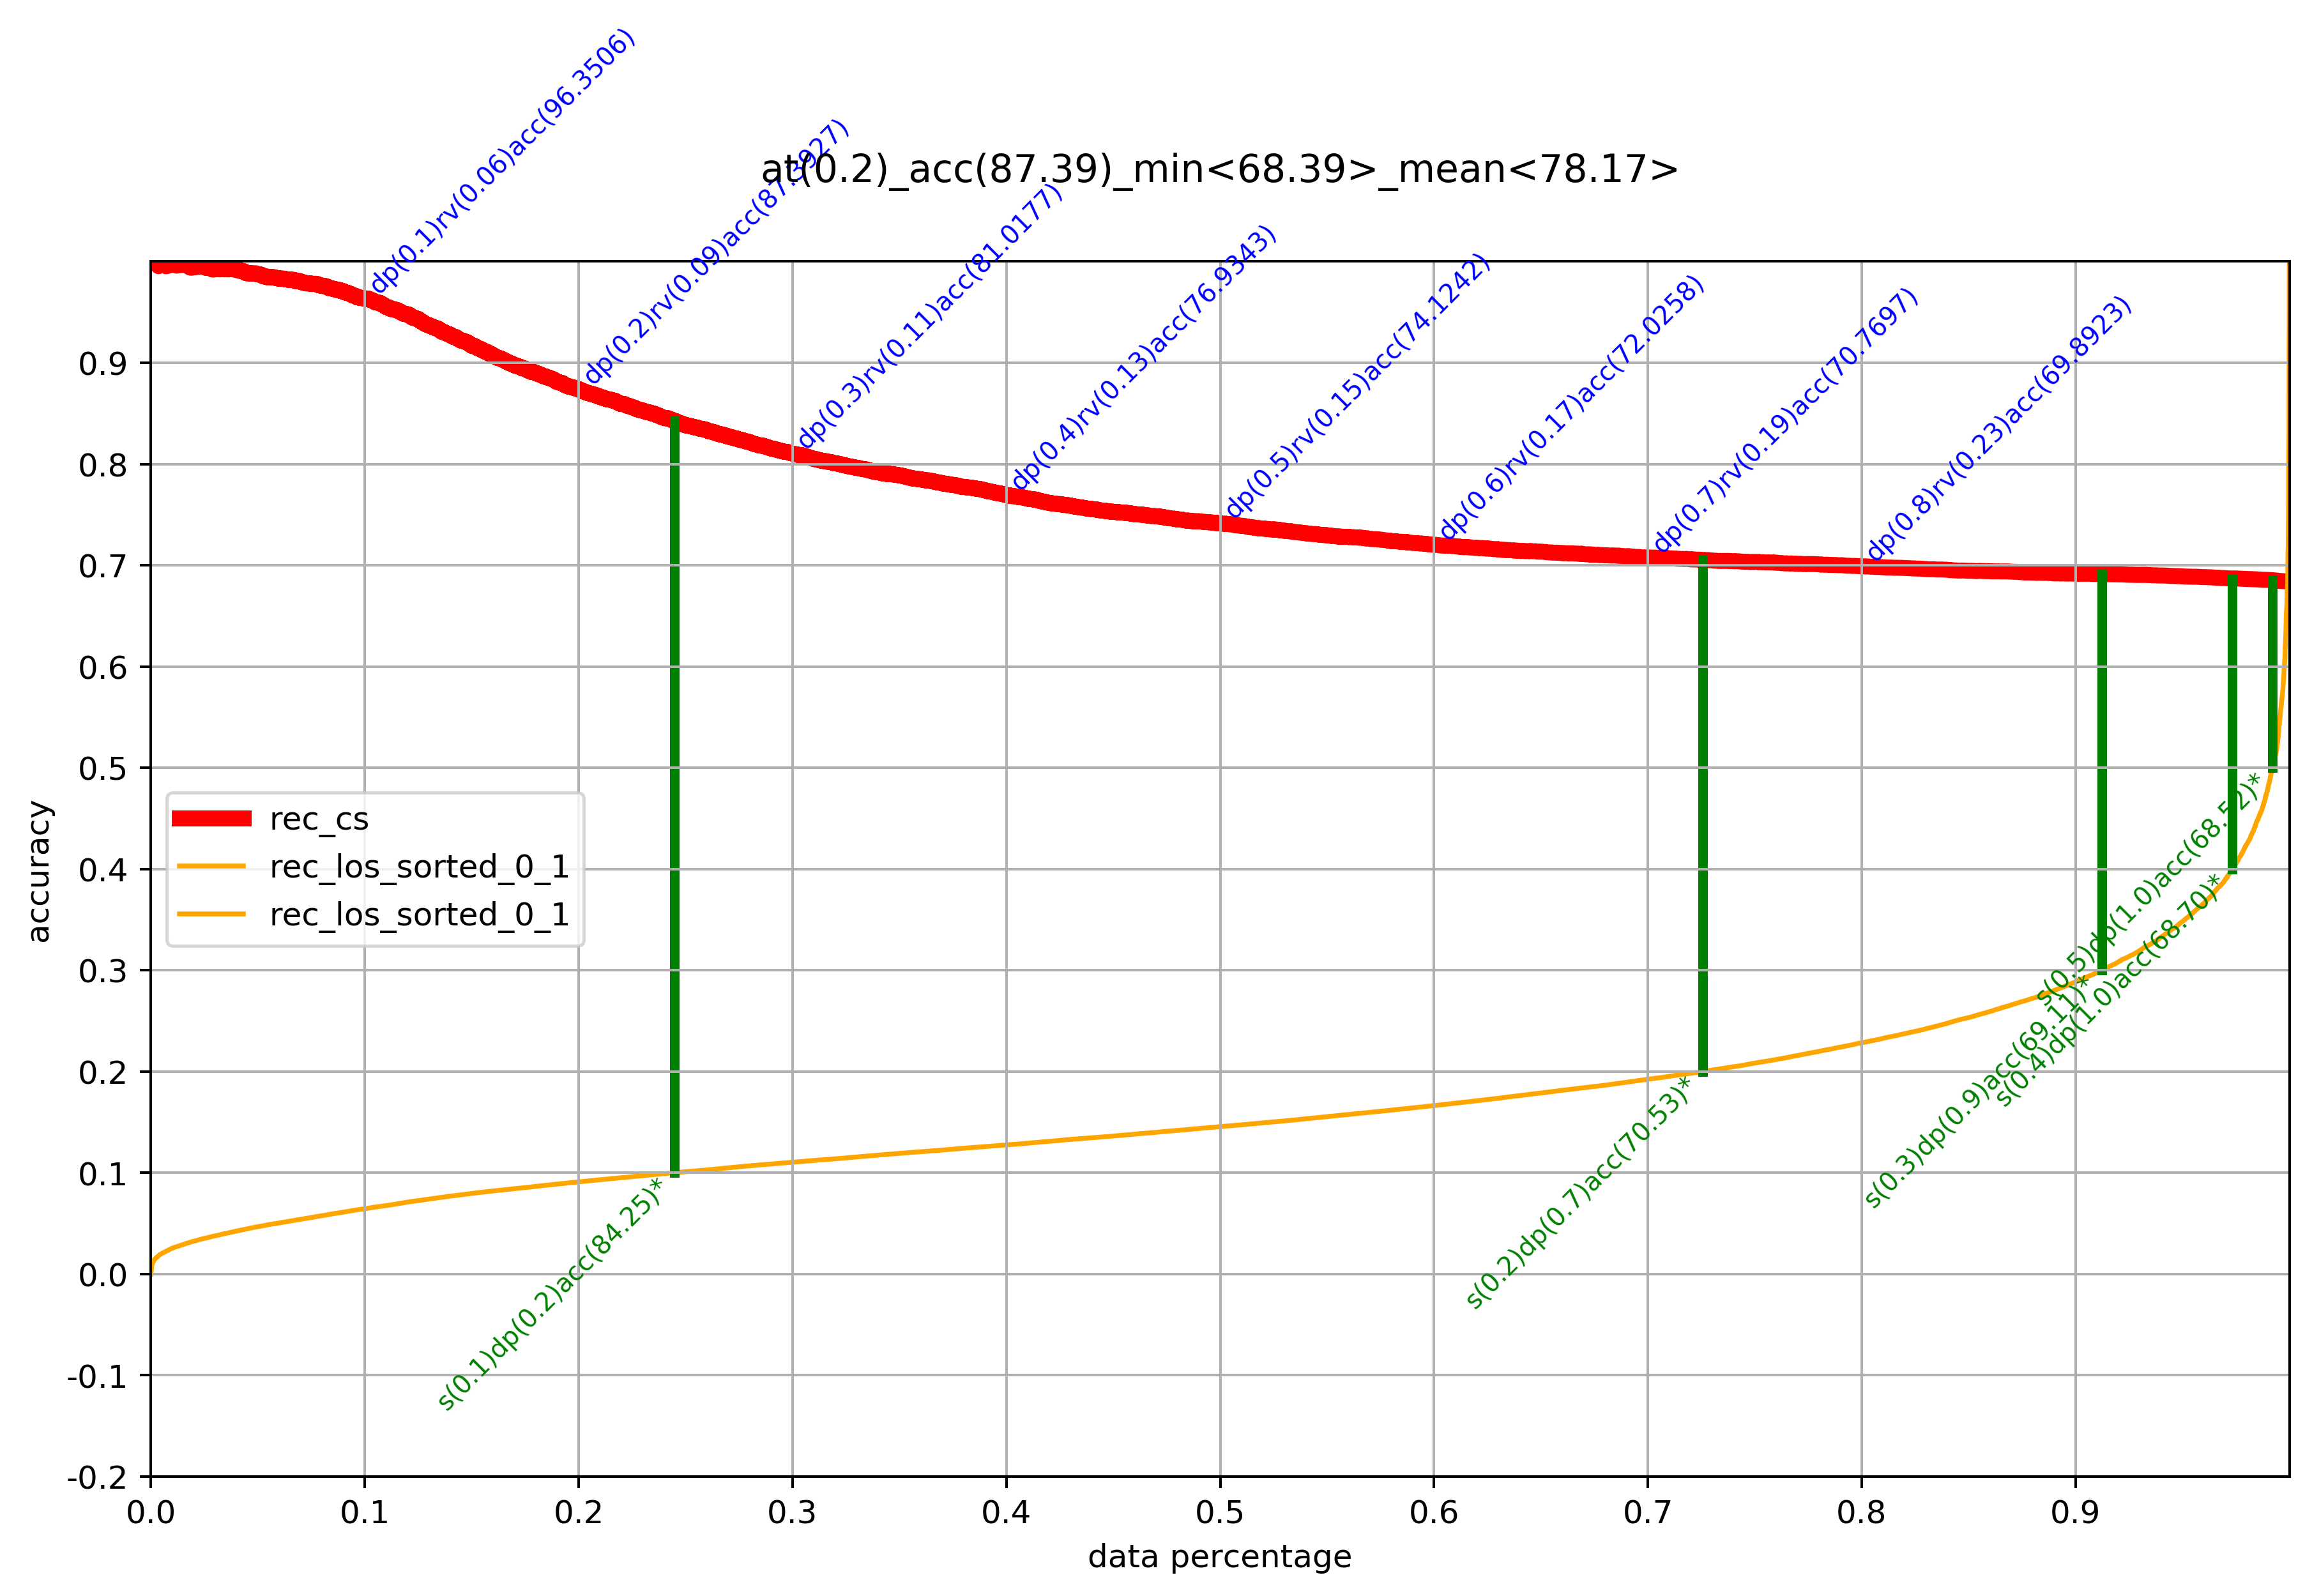

In [14]:
impL.reload(prHF)
_evs = get_epoch(ep_str='epoch0014')
epoch_id = 14
print(exp_fold, epoch_id)
save_at_file_name=os.path.join(exp_fold, "plots", "reconstruct_sort_{:03d}_ACCSTR.jpeg".format(epoch_id))
prHF.analyze_reconstruction_values(reconstruction_loss_vec=_evs["reconstruction_loss"], 
                              cluster_labels=_evs["predictions"], real_labels=_evs["labels"],
                              centroid_info_pdf=_evs["kluster_centroids"], save_at_file_name=save_at_file_name,
                              str_size=8, verbose=2)

dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.1),at(11932),acc(85.99)
rec_v(0.2),at(41072),acc(71.10)
rec_v(0.3),at(53767),acc(69.94)
rec_v(0.4),at(58043),acc(68.98)
rec_v(0.5),at(59403),acc(68.50)
*-*-*
data_perc(0.1),at(6000),acc(94.6842)
data_perc(0.2),at(12000),acc(85.9595)
data_perc(0.3),at(18000),acc(79.8956)
data_perc(0.4),at(24000),acc(76.2802)
data_perc(0.5),at(30000),acc(73.7342)
data_perc(0.6),at(36000),acc(71.9869)
data_perc(0.7),at(42000),acc(71.0174)
data_perc(0.8),at(48000),acc(70.5089)
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.1),at(14682),acc(84.25)
rec_v(0.2),at(43541),acc(70.53)
rec_v(0.3),at(54732),acc(69.11)
rec_v(0.4),at(58400),acc(68.70)
rec_v(0.5),at(59529),acc(68.52)
*-*-*
data_perc(0.1

dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.1),at(18862),acc(77.86)
rec_v(0.2),at(45718),acc(70.63)
rec_v(0.3),at(55522),acc(69.61)
rec_v(0.4),at(58595),acc(68.98)
rec_v(0.5),at(59562),acc(68.74)
*-*-*
data_perc(0.1),at(6000),acc(92.4846)
data_perc(0.2),at(12000),acc(84.0180)
data_perc(0.3),at(18000),acc(78.4123)
data_perc(0.4),at(24000),acc(75.4094)
data_perc(0.5),at(30000),acc(73.1842)
data_perc(0.6),at(36000),acc(71.7563)
data_perc(0.7),at(42000),acc(70.9816)
data_perc(0.8),at(48000),acc(70.4319)
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.1),at(17722),acc(79.70)
rec_v(0.2),at(45289),acc(70.70)
rec_v(0.3),at(55415),acc(70.04)
rec_v(0.4),at(58560),acc(69.60)
rec_v(0.5),at(59548),acc(69.40)
*-*-*
data_perc(0.1

dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.1),at(19960),acc(80.96)
rec_v(0.2),at(46661),acc(73.94)
rec_v(0.3),at(55913),acc(72.89)
rec_v(0.4),at(58743),acc(72.33)
rec_v(0.5),at(59620),acc(72.11)
*-*-*
data_perc(0.1),at(6000),acc(95.4341)
data_perc(0.2),at(12000),acc(87.7927)
data_perc(0.3),at(18000),acc(82.1621)
data_perc(0.4),at(24000),acc(78.7926)
data_perc(0.5),at(30000),acc(76.6408)
data_perc(0.6),at(36000),acc(75.2285)
data_perc(0.7),at(42000),acc(74.4054)
data_perc(0.8),at(48000),acc(73.7672)
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.1),at(20321),acc(80.13)
rec_v(0.2),at(46724),acc(72.03)
rec_v(0.3),at(55954),acc(71.06)
rec_v(0.4),at(58730),acc(70.62)
rec_v(0.5),at(59615),acc(70.39)
*-*-*
data_perc(0.1

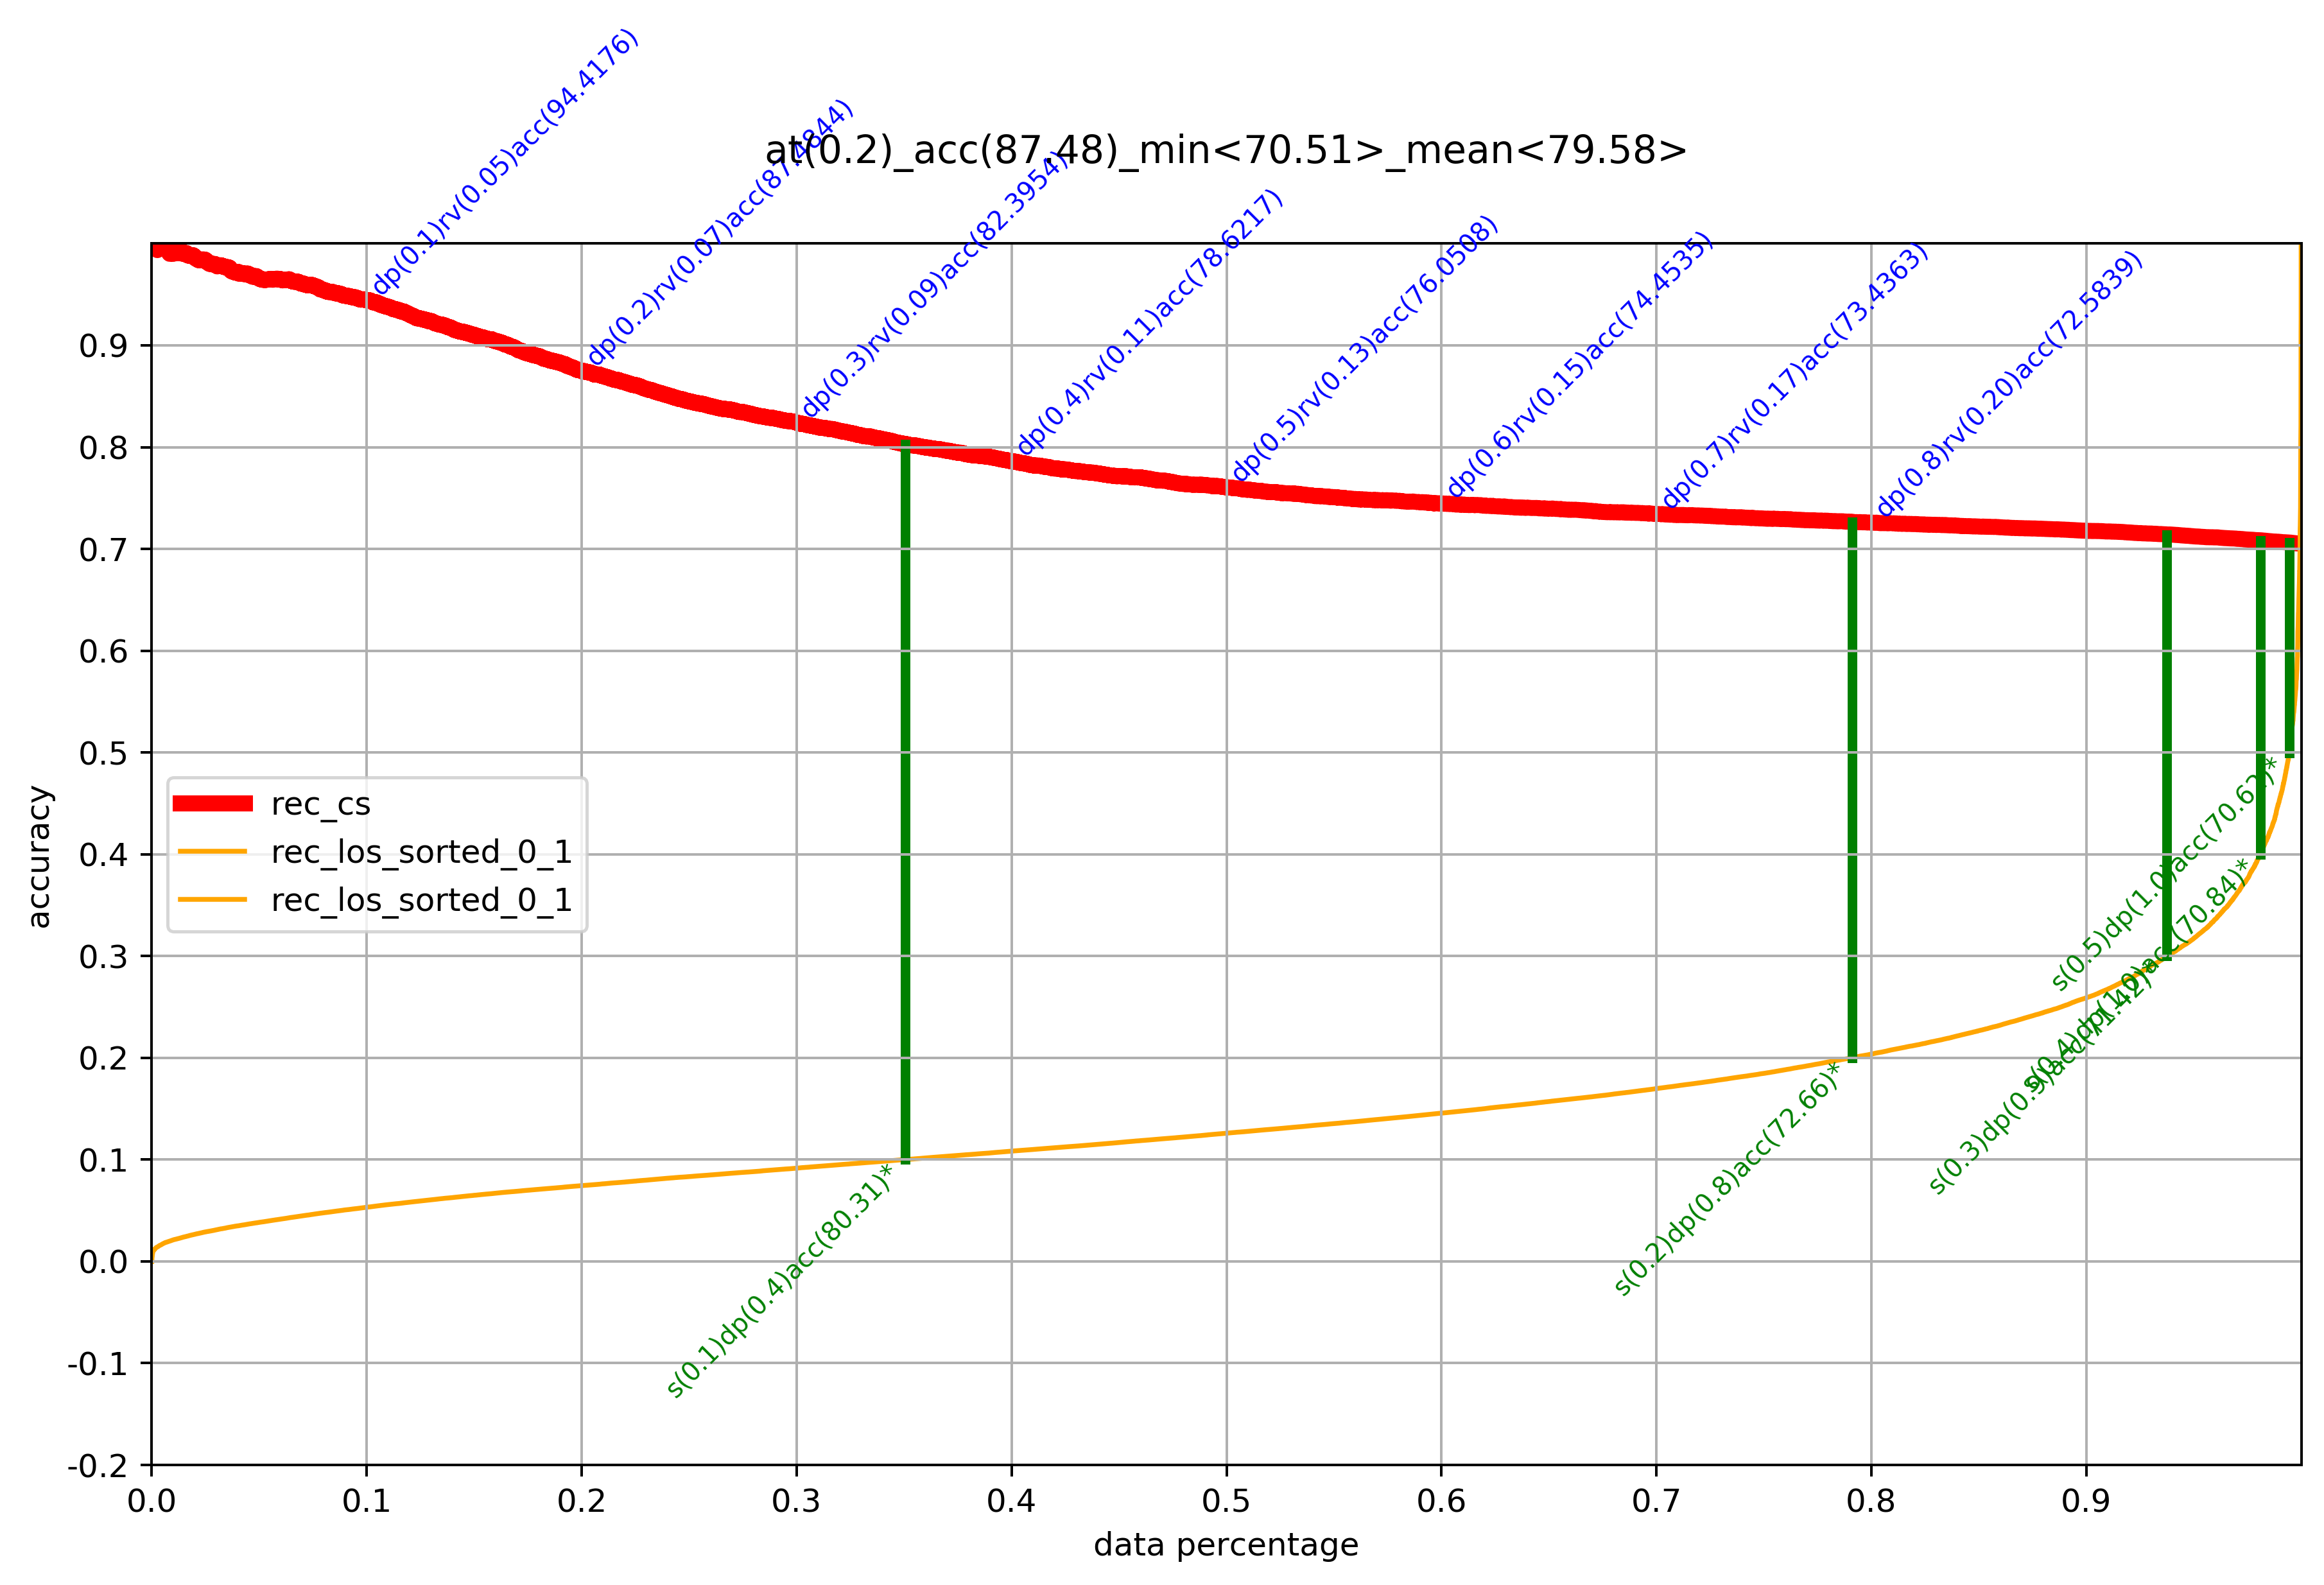

In [17]:
for ep_str in sil_var.keys():
    _evs = get_epoch(ep_str=ep_str)
    epoch_id = int(ep_str.replace("epoch", ""))
    save_at_file_name=os.path.join(exp_fold, "plots", "reconstruct_sort_{:03d}_ACCSTR.jpeg".format(epoch_id))
    prHF.analyze_reconstruction_values(reconstruction_loss_vec=_evs["reconstruction_loss"], 
                                  cluster_labels=_evs["predictions"], real_labels=_evs["labels"],
                                  centroid_info_pdf=_evs["kluster_centroids"], save_at_file_name=save_at_file_name,
                                  str_size=8, verbose=2)